In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTAMOS LIBRERIAS DE SKLEARN

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# CARGAMOS EL DATASET

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None,sep='\s+')
df.columns =  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# EDA

In [4]:
df.isna().sum().sum()

0

## CORRELACIONES

<Axes: >

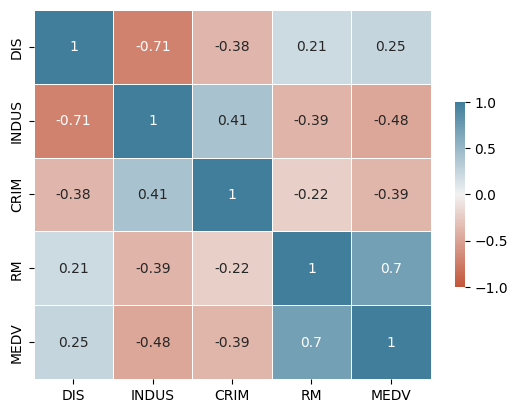

In [5]:
cols = ['DIS','INDUS','CRIM', 'RM', 'MEDV']
sns.heatmap(
    data=df[cols].corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

<Axes: xlabel='DIS', ylabel='MEDV'>

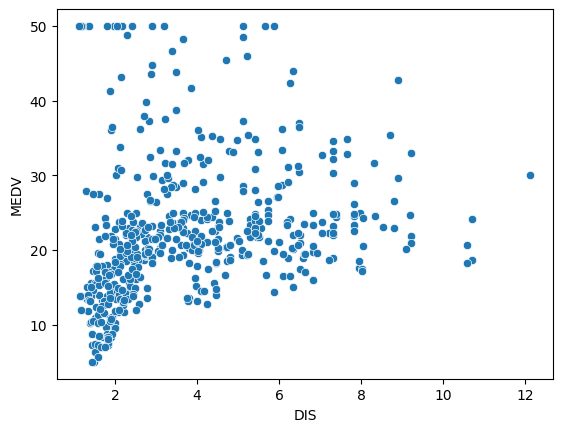

In [6]:
sns.scatterplot(data=df,x=df['DIS'],y=df['MEDV'])

# CREANDO EL MODULO DE REGRESIÓN LINEAL CON SKLEARN


In [7]:
X = df[['RM','DIS']].values
y = df['MEDV'].values.reshape(-1,1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [10]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred.shape

(102, 1)

# METRICAS DEL MODELO

In [15]:
import sklearn.metrics as metrics

#erro cuadratico medio
mse = metrics.mean_squared_error(y_test,y_pred)
#R2 Coeficiente de determinación
r2 = metrics.r2_score(y_test,y_pred)

print(f'El error cuadratico medio(MSE) es de {round(mse,4)}')
print(f'El coeficiente de determinación(R2) es de {round(r2,4)}')


El error cuadratico medio(MSE) es de 0.4357
El coeficiente de determinación(R2) es de 0.5643


# GRAFICAMOS RESULTADOS

In [16]:
import plotly.express as px

In [17]:
x1_range = np.arange(df['RM'].min(),df['RM'].max())
x2_range = np.arange(df['DIS'].min(),df['DIS'].max())

X1,X2 = np.meshgrid(x1_range,x2_range)
plano = pd.DataFrame({'RM':X1.ravel(),'INDUS':X2.ravel()})

#predecir valores
pred = model.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

#creamos DataFrame para plotly express
df_plot = pd.DataFrame({'RM':X1.ravel(),'DIS':X2.ravel(),'MEDV':pred.ravel()})

fig = px.scatter_3d(df,x='RM',y='DIS',z='MEDV',color_discrete_sequence=['red'])

fig.add_traces(px.scatter_3d(df_plot,x='RM',y='DIS',z='MEDV',opacity=0.4).data)

fig.update_layout(
    scene=dict(
        xaxis_title='RM',
        yaxis_title='DIS',
        zaxis_title='MEDV',
    ),
    title='grafico 3d'
)

fig.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
